In [1]:
print("Multimedia Security Experiment 4")

Multimedia Security Experiment 4


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import numpy.fft as fft
import myipf
#from mpl_toolkits.mplot3d.axes3d import Axes3D

%matplotlib inline
plt.rcParams["font.sans-serif"] = ["SimHei"] # 用来正常显示中文
plt.rcParams["axes.unicode_minus"] = False # 用来正常显示负号
%config InlineBackend.figure_format = "svg"

## 1.提取某一边界框的频谱图进行傅里叶逆变换

In [3]:
img = plt.imread("images/lena.bmp")

In [4]:
grayImg = np.dot(img, [0.299,0.587,0.114]) # 加权平均后转为单通道灰度图像

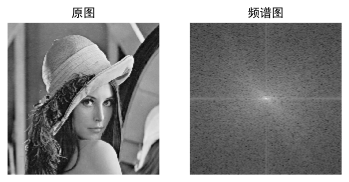

In [5]:
fImg = np.fft.fft2(grayImg) #, s=(300,300))
fsImg = np.fft.fftshift(fImg) # 直流分量（低频）移动到图像中心
result = 20 * np.log(np.abs(fsImg)) # 方便可视化
plt.subplot(121), plt.imshow(grayImg, cmap="gray"), plt.title("原图"), plt.axis("off")
plt.subplot(122), plt.imshow(result, cmap="gray"), plt.title("频谱图"), plt.axis("off")
plt.show()

In [8]:
def ifftROI(fImage, size):
    hSize = fImage.shape[0] // 2
    vSize = fImage.shape[1] // 2
    fsImg = fImage.copy()
    fsImg[hSize-size:hSize+size, vSize-size:vSize+size] = 0
    #fsImg = np.fft.ifftshift(fsImg)
    fftShow = 20 * np.log(np.abs(fsImg) + 1) # 加一防止log(0)错误
    result = np.fft.ifft2(fsImg)
    result = np.abs(result)
    plt.subplot(121), plt.imshow(fftShow, cmap="gray"), plt.title("频谱图"), plt.axis("off")
    plt.subplot(122), plt.imshow(result, cmap="gray"), plt.title("ROI区域置0的傅里叶逆变换"), plt.axis("off")
    plt.show()
    return result

def calcMSEPSNR(image1, image2):
    M = image1 - image2
    MSE = np.sum(M.flatten() * M.flatten()) / np.size(grayImg)
    PSNR = 10 * np.log10((255 ** 2) / MSE)
    print("均方差：", MSE)
    print("峰值信噪比：", PSNR)

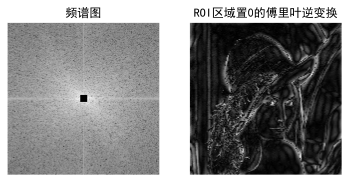

均方差： 14043.39580272529
峰值信噪比： 6.656082245795093


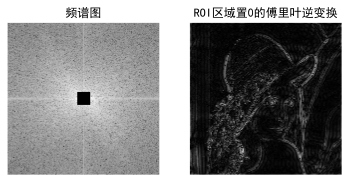

均方差： 15243.72345459525
峰值信噪比： 6.299892994894217


In [6]:
myipf.calcMSEPSNR(grayImg, myipf.ifftROI(fsImg, 10)) # 20×20
myipf.calcMSEPSNR(grayImg, myipf.ifftROI(fsImg, 20)) # 40×40

#### 
把直流分量区域置0后图像的灰度将变得不明显，置0区域越大越不明显，且与灰度图的差异越来越大。
若直流分量区域以外的区域置0，则灰度将保留，但图像将十分模糊，如下

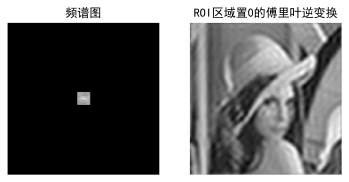

In [7]:
fImg = fsImg.copy()
fImg[0:230, 0:500] = 0
fImg[270:500, 0:500] = 0
fImg[230:270, 0:230] = 0
fImg[230:270, 270:500] = 0
#fsImg = np.fft.ifftshift(fsImg)
fftShow = 20 * np.log(np.abs(fImg) + 1) # 加一防止log(0)错误
result = np.fft.ifft2(fImg)
result = np.abs(result)
plt.subplot(121), plt.imshow(fftShow, cmap="gray"), plt.title("频谱图"), plt.axis("off")
plt.subplot(122), plt.imshow(result, cmap='gray'), plt.title("ROI区域置0的傅里叶逆变换"), plt.axis("off")
plt.show()

## 2.统一幅值的傅里叶逆变换

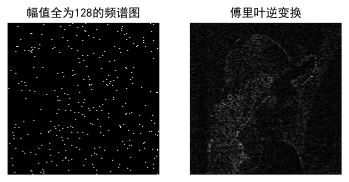

均方差： 17676.466252752823
峰值信噪比： 5.656849124262209


In [8]:
fs128 = (fsImg * 128) / np.abs(fsImg)
fftShow = 20 * np.log(np.abs(fs128))
result = np.fft.ifft2(fs128)
result = np.abs(result)
plt.subplot(121), plt.imshow(fftShow, cmap="gray"), plt.title("幅值全为128的频谱图"), plt.axis("off")
plt.subplot(122), plt.imshow(result, cmap="gray"), plt.title("傅里叶逆变换"), plt.axis("off")
plt.show()
myipf.calcMSEPSNR(grayImg, result)

#### 
幅值全部设为128，频谱图与星空图十分相似，由频谱图逆变换得到的图像星系图，只有大概的轮廓。

## 3.两个图像傅里叶变换后交换幅值和相位
从实验结果来看，相位包括轮廓信息，即哪些点应该有像素值存在；
幅度主要表示灰度信息，即哪些像素该取什么值。

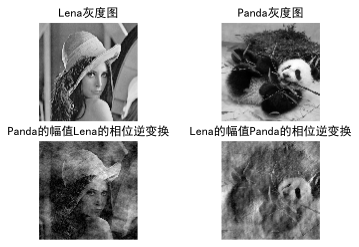

Lena图：
均方差： 2311.369133037793
峰值信噪比： 14.492110516330609
Panda图：
均方差： 2813.8235887175097
峰值信噪比： 13.637834947941066


In [9]:
img1 = plt.imread("images/lena.bmp")
img2 = plt.imread("images/panda.bmp") # 找不到其他适合的图像，就用张熊猫图

gLena = np.dot(img1, [0.299,0.587,0.114])
gPanda = np.dot(img2, [0.299,0.587,0.114])

fftLena = fft.fft2(gLena)
fftPanda = fft.fft2(gPanda)

absLena = np.abs(fftLena)
absPanda = np.abs(fftPanda)

angLena = np.angle(fftLena)
angPanda = np.angle(fftPanda)

newfLena = np.zeros(fftLena.shape, dtype='complex64')
newfPanda = np.zeros(fftPanda.shape, dtype='complex64')

newfLena.real = absPanda * np.cos(angLena)
newfLena.imag = absPanda * np.sin(angLena)

newfPanda.real = absLena * np.cos(angPanda)
newfPanda.imag = absLena * np.sin(angPanda)

newLena = np.abs(np.fft.ifft2(newfLena))
newPanda = np.abs(np.fft.ifft2(newfPanda))

plt.subplot(221), plt.imshow(gLena, cmap="gray"), plt.title("Lena灰度图"), plt.axis("off")
plt.subplot(222), plt.imshow(gPanda, cmap="gray"), plt.title("Panda灰度图"), plt.axis("off")
plt.subplot(223), plt.imshow(newLena, cmap="gray"), plt.title("Panda的幅值Lena的相位逆变换"), plt.axis("off")
plt.subplot(224), plt.imshow(newPanda, cmap="gray"), plt.title("Lena的幅值Panda的相位逆变换"), plt.axis("off")
plt.show()
print("Lena图：")
myipf.calcMSEPSNR(gLena, newLena)
print("Panda图：")
myipf.calcMSEPSNR(gPanda, newPanda)